# CAP 5619 AI for FinTech 
#### Spring 2023
### Midterm - Group Research Project

## Title : Predictive Analytics and Advanced Regression to Predict Home Values
### Group Id : A
#### Group Members Names : Fabian Richard, Aj Seals, Sai Jayanth, Nicholas Strange

1. Which features of a home have the greatest positive impact on the home values?
2. Which features of a home have the greatest negative impact on the home values?
3. Which features could be discarded, saving on building costs?
4. How much percentage resale value would an additional unit add to your home? 1 sqft, 1 room , … 
5. What feature formula predicts housing prices most accurately?


https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

### 1 Problem Statement (Upto 200 words) .

For our research project, we attempt to produce a machine learning algorithm to predict housing prices based on established features of a home. Our goal is to target home builders to give them 
a tool to optimize their builds. Understanding the effects of each feature in a home on its price will allow them to cross reference this data with construction costs and help them decide which features are most desirable or cost efficient depending on the type of home they intend on building. Our model leverages housing data sourced from Kaggle. We use this data to answer a few questions:

1. Which features of a home have the greatest positive impact on the home values?
2. Which features of a home have the greatest negative impact on the home values?
3. Which features could be discarded to save on construction costs?
4. What is the effect of an additional unit of a feature on the sale price? (i.e. Change in price per additional sqft)
5. What feature formula predicts housing prices most accurately?

Based on the articles found in our research, we expect price to be most affected by the total square footage of a home, with XGBoost producing the most accurate price predictions. Two of our 
resources resulted in the most success with the XGBoost model when applied to housing price prediction. (Grybauskas, 2021; Satish, 2019)


### 2 Literature (Upto 500 words)

For the purposes of our project, we decided to use the Ames Housing dataset, which was very reasonable for our purpose of predictive analysis and advanced regression in housing prices. The main advantage that this data presents is that it shows over 1,400 homes, their sale price, and over 79 features, ranging from living area, and the number of bedrooms, garage size, and the list goes on. With the information in the data that contains many features from a large number of homes in Ames, Iowa, one will be able to use them for the aim to find which features precisely influence the overall sale price.

The project requires the development of predictive models and advanced regressions with the goal of finding home values based upon the features of the residential properties. One thing that can be done is the use of advanced regression methods, which include the Linear Regression, Decision Tree, Random Forest, KNN(K- Nearest Neighbor), Gradient Boosting, and SVR(Support Vector Regression). With these models in place, the data set will be able to have a thorough leveraging of the data sets of the properties, which will be to the development of a more precise and stronger predictive model for the deciding factor of the Sale Price.

Speaking of the models and how they impact the analysis, Linear regression would be one of the first things to come up, as it tries to find the relationship between the independent variables (the features) and the dependent variable (the sale price). The second most important one would be the Decision Tree, what it does is it separates the data into smaller and smaller subsets till a point when all the separated subsets have only one target value, which in our given case, it would be the Sale Price. After the decision tree is implemented, Random Forest would have to be implemented, which works on improving the precision of the prediction. Random Forest would randomly select the subsets of features and a subset of data for each decision tree in order to decrease the problem of overfitting. Finally Random Forest combines the different features that were separated by the decision and predicts the sale price based upon the average of the target values in the decision trees.

KNN is also one the parameters that are used in advanced regression, which works on taking the training set, and predicting the values based on the K closest observations in it. The K value is what decides what all neighbors, in our case features, to be considered. Then comes Gradient Boosting, which is a ML method that works with the non-linear relationships and long length data sets, seeing into the non-linear data sets in training and test data sets, one can accurately predict based upon features that Linear Regression cannot do. Finally comes the SVR, which works parallelly with gradient boost, but it is specifically designed for the need to have multiple features, which in some cases Gradient Boosting might fail to give an accurate prediction.


### 3 Modeling Type and Technique (Upto 1500 words)
The following will detail our progress and key learning concepts regarding our machine learning model. We begin by importing and assessing our training dataset given to us by Kaggle. Previewing our data allows us to understand the type and completeness of the data. To do this we utilize the “describe()” and “info()” commands. After viewing the data, we move on to isolate features of the dataset that will be most helpful for our model. Since our target metric is sale price, we leverage the correlation method on all house features against sale price. To improve readability and comprehension of the data, we visualize a number of metrics using graphs, charts, etc. For example, we used a heatmap to visualize correlation. We chose to work with only the top ten most correlated features. These visualizations also made it simple to identify any outliers.

The next section works to answer the research questions defined in our problem statement. The first three questions were able to be solved utilizing the correlation method—identifying each feature’s correlation with the sale price in the training dataset. Question 4 required us to build a mathematical formula in order to calculate the incremental value of specific home features. The last question begins our dive into machine learning. To choose a training algorithm, we constructed some of the most popular algorithms and calculated performance metrics to compare their accuracy on our dataset.

Building a model to accurately predict home valuations using 79 features needed to be robust and consistent. After searching through numerous research papers and projects previously built on the subject, it became clear that a linear regression model was the best fit given the data and intended outcome. Regression analysis is useful in identifying and quantifying relationships and impacts of features on data. We are then able to distinguish between those features that have a direct correlation to a set output and those that do not. These are referred to as dependent and independent variables relative to the data set (Gallo, 2022). This approach was ideal for our housing feature dataset because it allowed us to utilize or exclude features based on their relation to the home sale price.

In the implementation of our model, we started with performing a general analysis on the data set. This was performed using multiple NumPy and Pandas functions to visualize and quantify the relationships between the data. Once this was complete, we were able to separate the independent and dependent features in relationship to the home value. This is a key aspect of any model implementation because it rids the training set of any irrelevant and outlier data points. By removing these data points from the training set, we increase the accuracy and performance of our model. The performance aspect will be immensely important when the model is detached from the training model and tested on larger ambiguous real-world data.

At this point of our project, we have identified the independent and dependent variables in relation to price. Additionally, we have completed a thorough analysis of the dataset and removed any irrelevant or outlier information. The model has also been split up and primed to be trained. However, at this stage of the project, we have not definitively decided on the best technique for training our data. Rather, we have implemented and tested numerous training techniques to compare and test their performance.

Although all techniques performed in our model are implemented using the SKLearn module, the approach and more importantly, the results differ. In Addition to testing multiple techniques and comparing the results, we also included an original target and target log version of each of the individual techniques. Nearly as important as the model selected, the performance measure that we have chosen to quantify the results of our model is Root-Mean-Squared-Error (RMSE) between the training set's predicted value and the actual sale price of the test set. We then included the Mean of Root-Mean-Squared-Error and the Standard Deviation of the Root-Mean-Squared-Error.

The first technique tested was the Linear Regression model using SKLearn’s linear model linear regression function. Next, we tested the Decision Tree method using SKLearn’s decision tree regressor method. Additionally, we introduced the Random Forest method using SKLearn’s Random Forest Regressor. Next, we implemented the KNN or K-Nearest-Neighbors technique using SKLearn’s built-in K-Neighbors Regressor function. We also tested the Gradient Boosting method available in SKLearn’s Gradient Boosting Regressor. Lastly, we implemented SKLearn’s Support Vector Regression technique. The Root-Mean-Squared-Error results are listed below.

While the results of the different models have been evaluated, we have not yet chosen a definitive direction. This is due to a few reasons. First, we would like to compare the computer performance of each individual approach. Even if the model seems accurate, it will prove useless if it cannot handle larger, real world data sets. Next, we need to ensure that there are no more insights to be gained from the data. If we happen to find additional use-cases, such as greenspace, we will need to rerun the model and compare the results. Lastly, we are in the process of stress testing the model to make certain that it can handle a variety of real-world data sets. 

### 4 Implementation

### Import Modules/Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### Import Data (Train and Test)

In [3]:
df_house_train = pd.read_csv(
    r"train.csv",
    low_memory=False,
)
df_house_test = pd.read_csv(
    r"test.csv",
    low_memory=False,
)

# drop columns with all NaN values
df_house_train.dropna(axis=1, how="all")
df_house_test.dropna(axis=1, how="all")

# limit to only residential properties
residential = ["FV", "RH", "RL", "RP", "RM"]
df_house_train = df_house_train[df_house_train["MSZoning"].isin(residential)]
df_house_test = df_house_test[df_house_test["MSZoning"].isin(residential)]
print("Train Data Shape: ", df_house_train.shape)
print("Test Data Shape: ", df_house_test.shape)


Train Data Shape:  (1450, 81)
Test Data Shape:  (1440, 80)


### Train Data Sample

In [4]:
df_house_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Combine Train and Test Data Sets

In [5]:
# Combine Train and Test data sets
    # this allows for all added column/features to be available in both 
Combined_df = pd.concat([df_house_train, df_house_test], ignore_index=True)


### Missing Data

In [6]:
missing_values = Combined_df.select_dtypes(object).isna().sum()
print(missing_values[missing_values > 0])
print("Total number of missing values:", Combined_df.isna().sum().sum())


Alley           2695
Utilities          1
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          75
BsmtCond          78
BsmtExposure      78
BsmtFinType1      75
BsmtFinType2      76
Electrical         1
KitchenQual        1
Functional         1
FireplaceQu     1393
GarageType       147
GarageFinish     149
GarageQual       149
GarageCond       149
PoolQC          2880
Fence           2322
MiscFeature     2787
SaleType           1
dtype: int64
Total number of missing values: 15189


In [7]:
# Fill missing data with median value

def fill_missing_data(df: pd.DataFrame):
    for col_ in df.columns:
        if df[col_].dtype == "object":
            # fill 'NONE' for categorical features
            df[col_].fillna("NONE", inplace=True)
        else:
            # fill median for numerical features
            df[col_].fillna(df[col_].median(), inplace=True)


fill_missing_data(Combined_df)


### Column Data Types

In [8]:
print(Combined_df.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object


### Data Summary & Findings

#### Data Statistical Summary

In [9]:
Combined_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,...,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000,2890.000000
mean,1457.373356,57.143599,69.080277,10155.187889,6.113149,5.572318,1971.810727,1984.511765,102.413495,444.443253,...,94.521799,47.501730,22.605882,2.598616,16.189273,2.274394,51.123529,6.208304,2007.791349,172830.611073
std,841.586687,42.455545,21.335762,7859.923112,1.391514,1.099952,29.968447,20.765000,179.459826,455.779690,...,126.846021,66.798967,63.882144,25.265379,56.422268,35.841781,570.142969,2.711117,1.313875,56768.470896
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,729.250000,20.000000,60.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,163500.000000
50%,1455.500000,50.000000,68.000000,9475.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,373.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,2183.750000,70.000000,78.000000,11577.750000,7.000000,6.000000,2001.000000,2004.000000,164.750000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,164000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### Data Information

In [10]:
Combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2890 non-null   int64  
 1   MSSubClass     2890 non-null   int64  
 2   MSZoning       2890 non-null   object 
 3   LotFrontage    2890 non-null   float64
 4   LotArea        2890 non-null   int64  
 5   Street         2890 non-null   object 
 6   Alley          2890 non-null   object 
 7   LotShape       2890 non-null   object 
 8   LandContour    2890 non-null   object 
 9   Utilities      2890 non-null   object 
 10  LotConfig      2890 non-null   object 
 11  LandSlope      2890 non-null   object 
 12  Neighborhood   2890 non-null   object 
 13  Condition1     2890 non-null   object 
 14  Condition2     2890 non-null   object 
 15  BldgType       2890 non-null   object 
 16  HouseStyle     2890 non-null   object 
 17  OverallQual    2890 non-null   int64  
 18  OverallC

#### Correlation by feature

In [11]:
# Pairwise Pearson correlations for train set 
price_correlations = df_house_train.corrwith(df_house_train["SalePrice"])
print(price_correlations)


Id              -0.024353
MSSubClass      -0.087487
LotFrontage      0.354848
LotArea          0.264715
OverallQual      0.789031
OverallCond     -0.089084
YearBuilt        0.517602
YearRemodAdd     0.501186
MasVnrArea       0.475950
BsmtFinSF1       0.384475
BsmtFinSF2      -0.014145
BsmtUnfSF        0.216152
TotalBsmtSF      0.612088
1stFlrSF         0.603300
2ndFlrSF         0.319774
LowQualFinSF    -0.018755
GrLivArea        0.708658
BsmtFullBath     0.224054
BsmtHalfBath    -0.017561
FullBath         0.556674
HalfBath         0.280882
BedroomAbvGr     0.162008
KitchenAbvGr    -0.137825
TotRmsAbvGrd     0.533355
Fireplaces       0.463264
GarageYrBlt      0.486058
GarageCars       0.642135
GarageArea       0.629831
WoodDeckSF       0.320770
OpenPorchSF      0.329491
EnclosedPorch   -0.120765
3SsnPorch        0.043807
ScreenPorch      0.110540
PoolArea         0.092396
MiscVal         -0.021052
MoSold           0.051987
YrSold          -0.025391
SalePrice        1.000000
dtype: float

### Data Visualization 

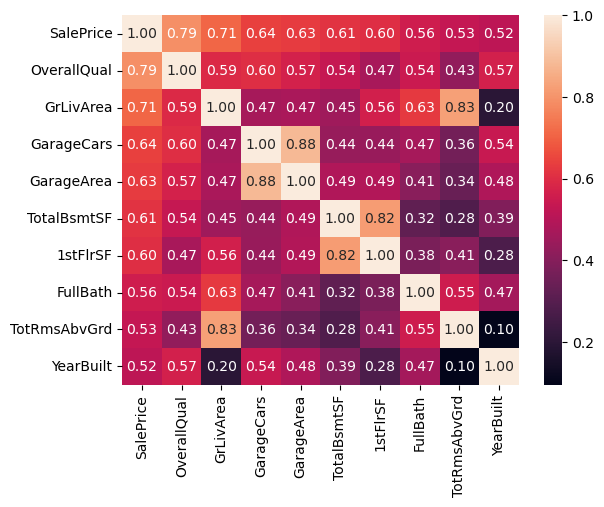

In [12]:
correlation = df_house_train.corr()
top_10_corr = correlation.nlargest(10, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_house_train[top_10_corr].values.T)
correlation_hm = sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=top_10_corr.values,
    xticklabels=top_10_corr.values,
)


### Clustering

In [13]:

# X = df_house_train[top_10_corr].values.reshape(-1, 1)

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Choose the number of clusters
# n_clusters = 5

# # Create an instance of the KMeans algorithm
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # Fit the KMeans model to the scaled data
# kmeans.fit(X_scaled)

# # Get the labels assigned to each point
# labels = kmeans.labels_

# # Compute the silhouette score
# score = silhouette_score(X_scaled, labels, metric='euclidean')

# # Print the silhouette score
# print(f'Silhouette Score: {score}')

In [14]:
# #Clustering results using a 3D scatter plot

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Select the top 3 correlated variables for visualization
# top_3_corr = correlation.nlargest(3, 'SalePrice')['SalePrice'].index
# X_3d = df[top_3_corr].values

# # Create a 3D scatter plot of the clustered data
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis')
# ax.set_xlabel(top_3_corr[0])
# ax.set_ylabel(top_3_corr[1])
# ax.set_zlabel(top_3_corr[2])
# plt.title('KMeans Clustering Results')
# plt.colorbar(scatter)
# plt.show()

In [15]:
# #Clustering results using a scatter plot matrix

# import seaborn as sns

# # Convert the clustered data to a Pandas DataFrame
# clustered_data = pd.DataFrame(X_scaled, columns=top_10_corr)
# clustered_data['label'] = labels

# # Create a scatter plot matrix using Seaborn
# sns.pairplot(clustered_data, hue='label', diag_kind='hist')

In [16]:
# #Clustering results usinga dendrogram

# from scipy.cluster.hierarchy import dendrogram, linkage

# # Compute the linkage matrix using Ward's method
# Z = linkage(X_scaled, method='ward')

# # Create a dendrogram
# plt.figure(figsize=(10, 6))
# dendrogram(Z)
# plt.title('Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.show()

In [17]:
# #Clustering results using a t-SNE plot

# from sklearn.manifold import TSNE

# # Create a t-SNE plot
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_scaled)

# plt.figure(figsize=(8, 8))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
# plt.title('t-SNE Clustering Results')
# plt.colorbar()
# plt.show()

#### Building Type

Text(0.5, 1.0, 'BldgType')

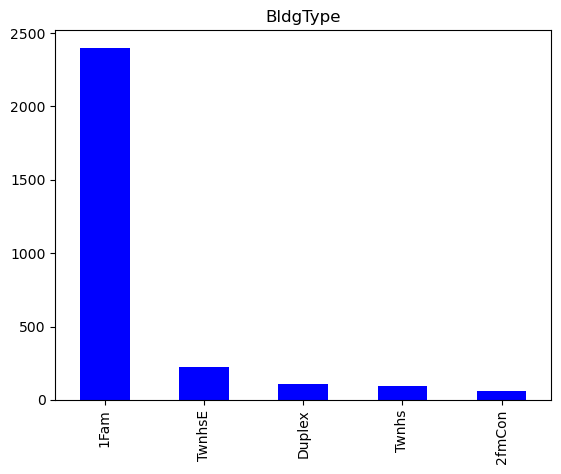

In [18]:
Combined_df["BldgType"].value_counts().head(10).plot(kind="bar", color="b")
plt.title("BldgType")


### Sale Price

Skewness: 1.9084160499655909
Kurtosis: 6.626182465209907


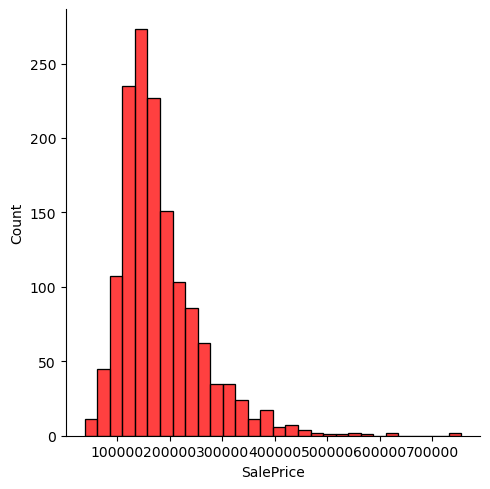

In [19]:
# Sale price histogram
sns.displot(df_house_train["SalePrice"], kde=False, color="red", bins=30)
print("Skewness:", df_house_train["SalePrice"].skew())
print("Kurtosis:", df_house_train["SalePrice"].kurt())


### Price vs. Sqft

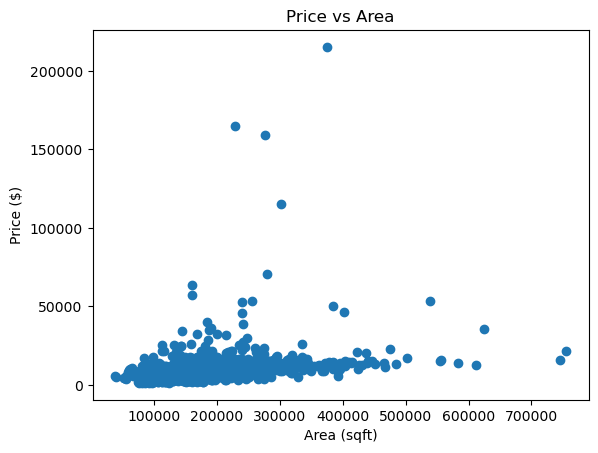

In [20]:
# plot a scatter plot price vs area
plt.scatter(df_house_train["SalePrice"], df_house_train["LotArea"])
# set axis lables
plt.xlabel("Area (sqft)")
plt.ylabel("Price ($)")
# set chart title
plt.title("Price vs Area")
plt.show()


#### All plots: Identifying Outliers

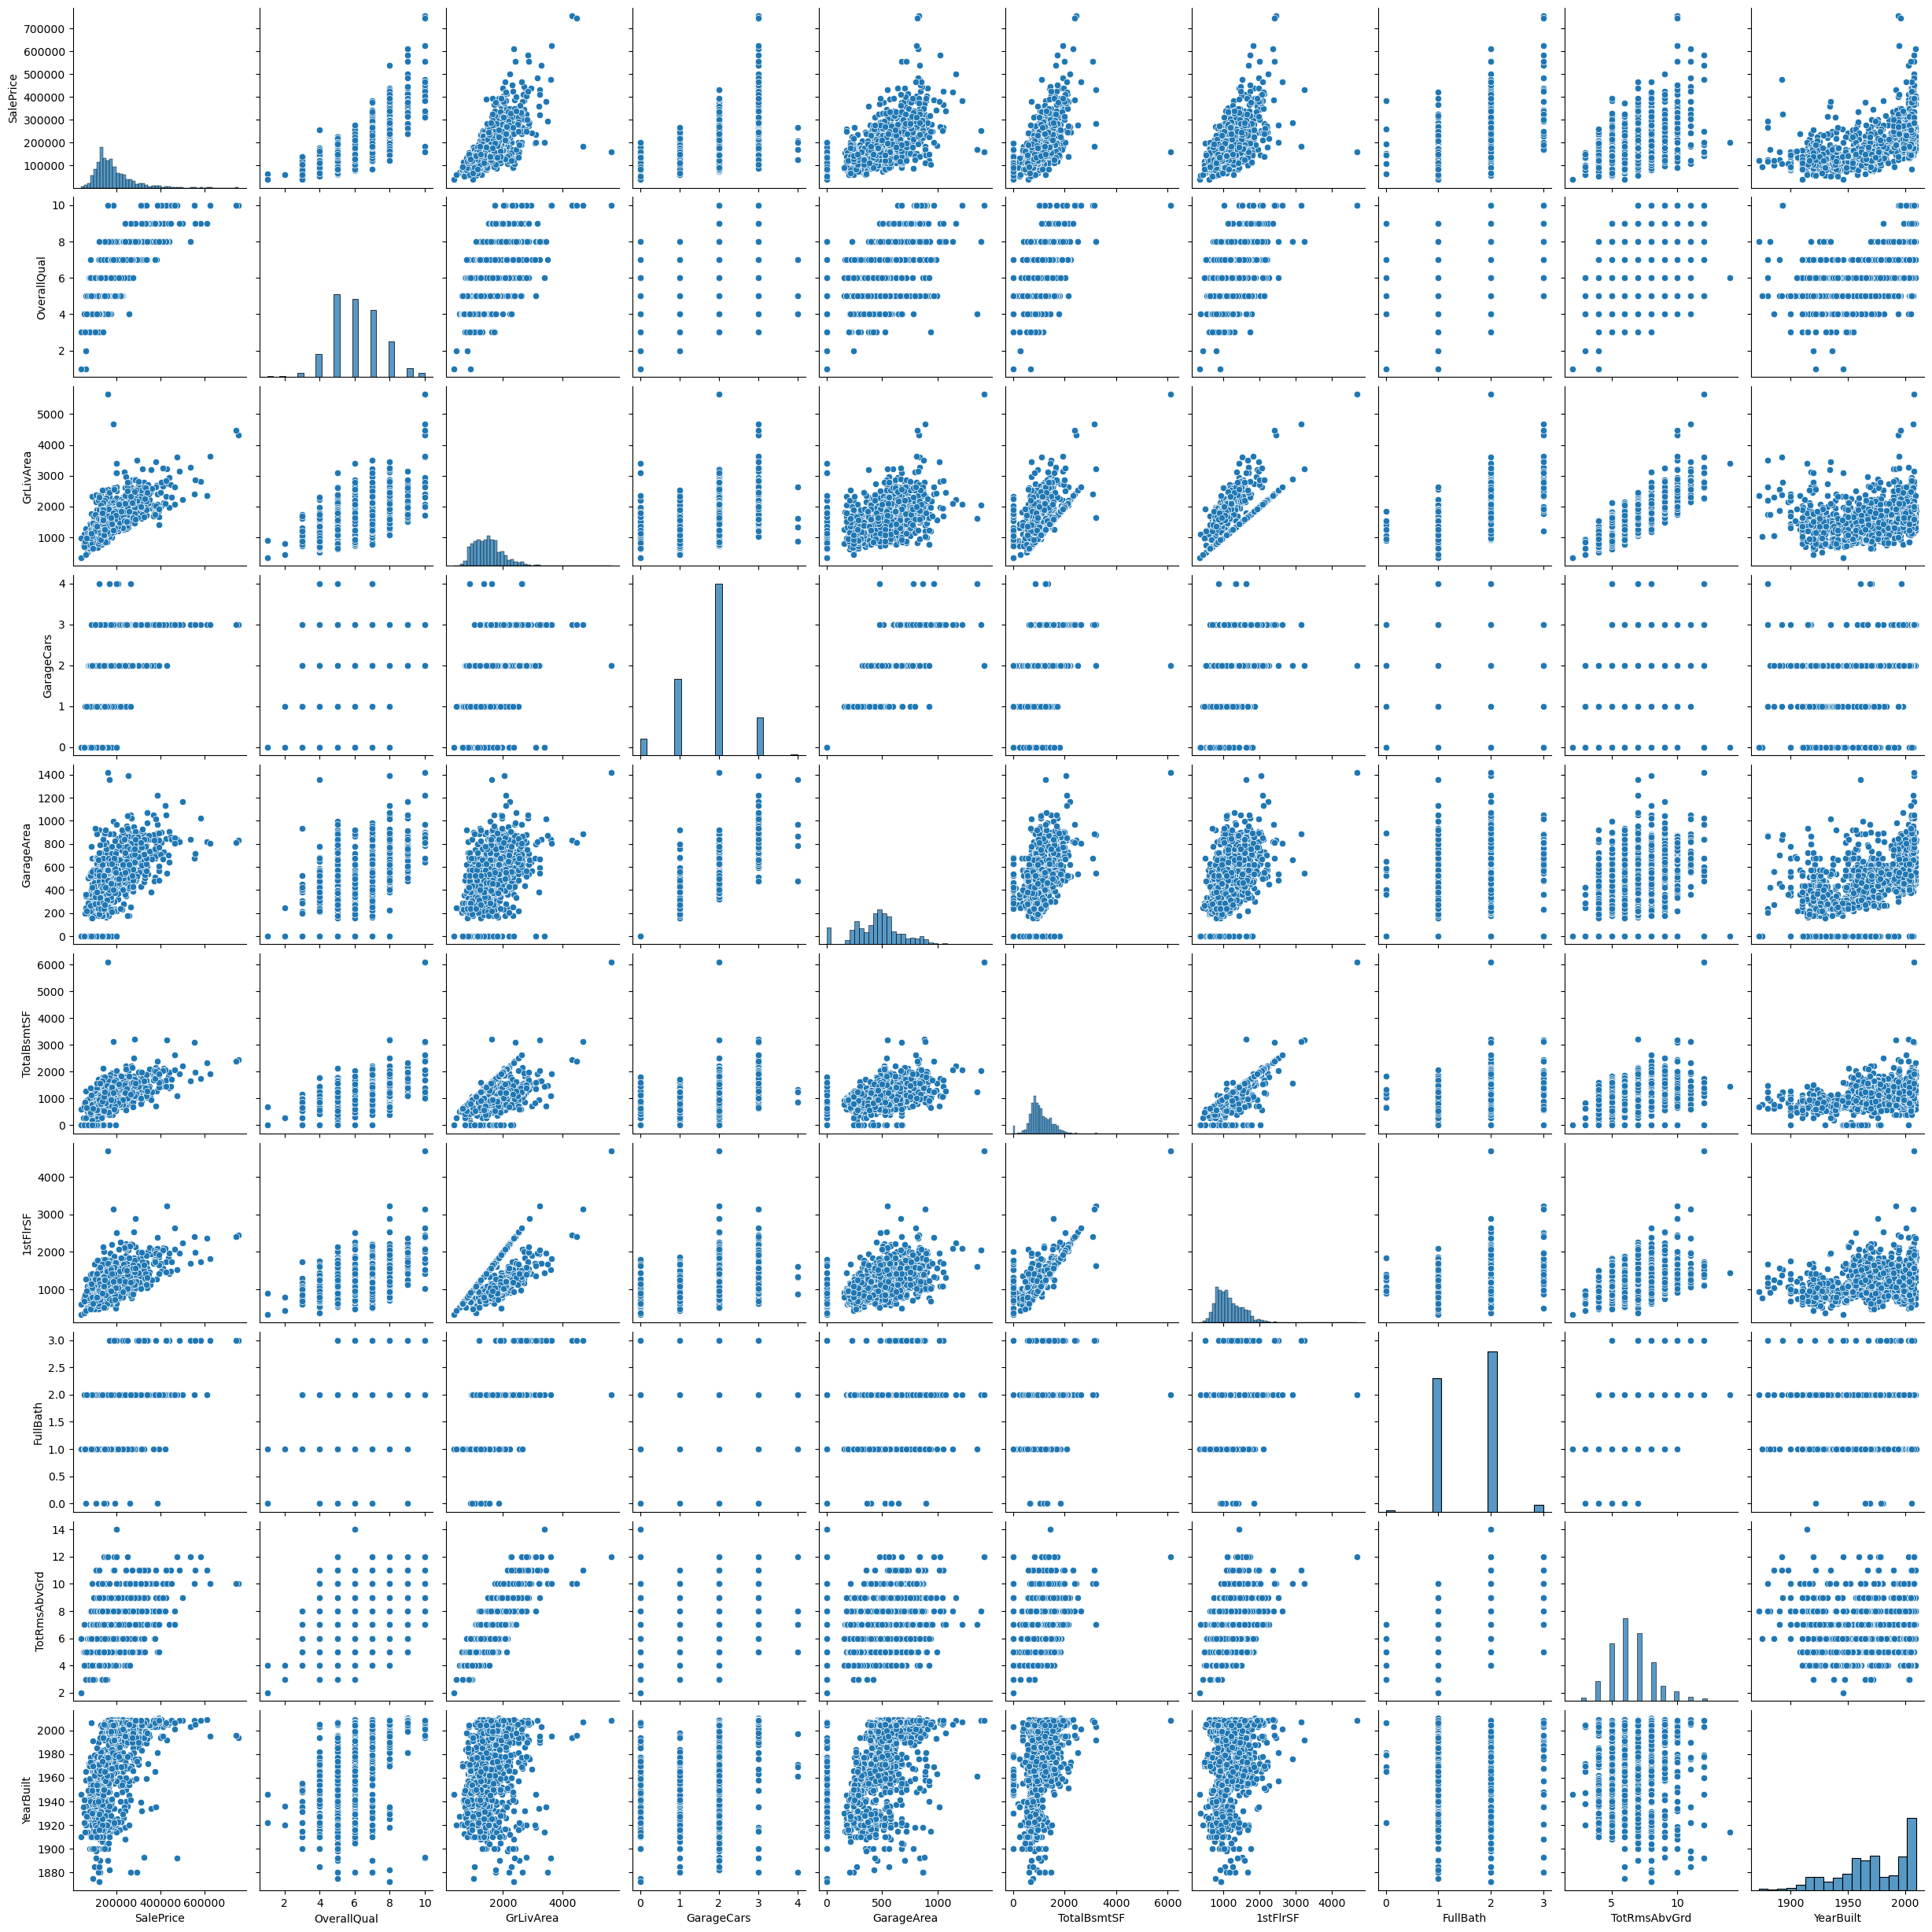

In [21]:
sns.pairplot(df_house_train[top_10_corr], height=2.5)


#### Remove Outliers

In [22]:
Combined_df = Combined_df[Combined_df.GrLivArea < 4400]
Combined_df = Combined_df[Combined_df.TotalBsmtSF < 2500]


# Results

In [26]:
# Average house price
print(
    "The average house price is", "${:,.2f}".format(df_house_train["SalePrice"].mean())
)


The average house price is $181,654.94


In [25]:
# Number of houses sold each year
ann_sales = (
    df_house_train.groupby(["YrSold"])["SalePrice"]
    .count()
    .reset_index(name="Count")
    .sort_values(["Count"], ascending=False)
)
print(ann_sales)


   YrSold  Count
3    2009    336
1    2007    328
0    2006    312
2    2008    302
4    2010    172


#### Predictors

## Questions

### 1. Which features of a home have the greatest positive impact on the home values?

In [27]:
print(top_10_corr)
print("THE FEATURES THAT HAVE THE GREATEST POSITIVE IMPACT")


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
THE FEATURES THAT HAVE THE GREATEST POSITIVE IMPACT


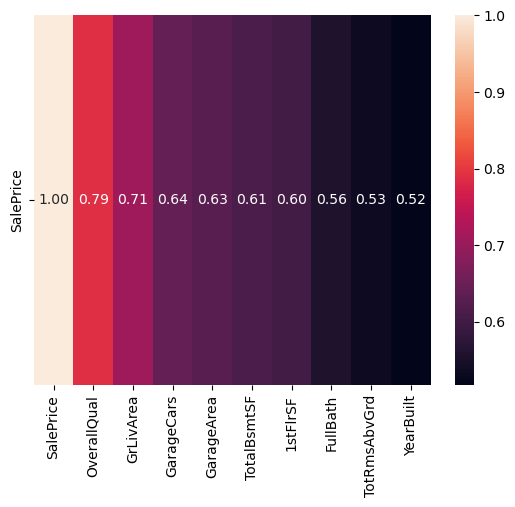

In [28]:
sales_correlation_hm = sns.heatmap(
    cm[:1],
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=top_10_corr[:1].values,
    xticklabels=top_10_corr.values,
)


### 2. Which features of a home have the greatest negative impact on the home values?

In [29]:
corr = df_house_train.corr()["SalePrice"]
negative_correlation = corr[corr < 0]
print("Features of a home that have the greatest negative impact")
print(negative_correlation)


Features of a home that have the greatest negative impact
Id              -0.024353
MSSubClass      -0.087487
OverallCond     -0.089084
BsmtFinSF2      -0.014145
LowQualFinSF    -0.018755
BsmtHalfBath    -0.017561
KitchenAbvGr    -0.137825
EnclosedPorch   -0.120765
MiscVal         -0.021052
YrSold          -0.025391
Name: SalePrice, dtype: float64


### 3. Which features could be discarded, saving on building costs?

In [30]:
threshold = 0.1
corr = df_house_train.corr()["SalePrice"]
lower_correlation = corr[abs(corr) < threshold]
print("The features could be discarded".format(threshold))
print(lower_correlation.index.tolist())


The features could be discarded
['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### 4. How much percentage resale value would an additional unit add to your home? 1 sqft, 1 room , …

In [31]:
data = df_house_train
x = data[["GrLivArea", "LotArea", "GarageArea", "OverallQual"]]
y = data["SalePrice"]


In [32]:
data["Additional Unit"] = 1


In [33]:
x_additional = data[
    ["GrLivArea", "LotArea", "GarageArea", "OverallQual", "Additional Unit"]
]


In [34]:
coef = (
    np.linalg.inv(x_additional.transpose().dot(x_additional))
    .dot(x_additional.transpose())
    .dot(y)
)


In [35]:
y_prediction = x.dot(coef[:-1]) + coef[-1]
y_additional = x_additional.dot(coef)


In [36]:
percentage_resalevalue = (y_additional - y_prediction / y_prediction) * 100

print("THE ADDED PERCENTAGE RESALE VALUE:", percentage_resalevalue.values[0])


THE ADDED PERCENTAGE RESALE VALUE: 21917355.45983853


### 5. What feature formula predicts housing prices most accurately?

### Building the Models

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [56]:
# Define features to use in model 
Features = top_10_corr.copy().delete([0])

In [57]:
# Create copy of data set
train_df = Combined_df.copy()
# Filter to rows included in df_house_train set for train 
train_df = train_df[train_df.Id.isin(df_house_train.Id)]

# Set up Train and Validation Sets
    # test size = 20%
    # random state = 42

X_train, X_valid, y_train, y_valid = train_test_split(
    train_df[Features], train_df["SalePrice"], test_size=0.2, random_state=42
)
_, X_valid_with_id, _, _ = train_test_split(
    train_df.drop("SalePrice", axis=1),
    train_df["SalePrice"],
    test_size=0.2,
    random_state=42,
)
# Create copy of comb_df
    # limit to only rows included in df_house_test for test 
test_df = Combined_df.copy()
test_df = test_df[test_df.Id.isin(df_house_test.Id)]

X_test = test_df[Features]


In [58]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


### TensorFlow DNN

In [68]:
import tensorflow as tf


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [60]:
tf.keras.backend.clear_session()

# Create Deep Neural Network Model 
    # Use relu to prevent vanishing gradient problem
DNNmodel = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
# Compile Model
    # Use mean squared error
    # Use Adam optimization with a learning rate of 0.01
DNNmodel.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["mse"])

DNNmodel.summary()


NameError: name 'tf' is not defined

In [61]:
# %%time

# Train for 1000 epochs
EPOCHS = 1000

# Stop model if validation mean squared error not improved for 24 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_mse", patience=25)

# Train DNN model 
history = DNNmodel.fit(
    X_train,
    y_train,
    batch_size=256,
    verbose=0,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop],
)


NameError: name 'tf' is not defined

In [45]:
# Evaluate Model
DNNmodel.evaluate(X_valid, y_valid, verbose=0)

[1729077376.0, 1729077376.0]

In [46]:
test_df["SalePrice"] = DNNmodel.predict(X_test)
DNNdata = test_df[["Id", "SalePrice"]]
DNNdata


45/45 [==============================] - 0s 2ms/step


,Id,SalePrice
1450,1461,121537.632812
1451,1462,168927.937500
1452,1463,168699.093750
1453,1464,185535.078125
1454,1465,217523.015625
...,...,...
2885,2915,76565.710938
2886,2916,90774.765625
2887,2917,154772.484375
2888,2918,112016.476562


### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression


In [44]:
LRmodel = LinearRegression()


In [45]:
LRmodel.fit(X_train, y_train)


LinearRegression()

In [46]:
print(f"Train score : {LRmodel.score(X_train,y_train)}")
print(f"Validation score : {LRmodel.score(X_valid,y_valid)}")

Train score : 0.8250800064033152
Validation score : 0.7734453477309706


In [47]:
LRdata = test_df[test_df.Id.isin(df_house_test.Id)]
LRdata["SalePrice"] = LRmodel.predict(X_test)
LRdata = LRdata[["Id", "SalePrice"]]
LRdata


,Id,SalePrice
1450,1461,121919.524540
1451,1462,169600.572702
1452,1463,171221.440740
1453,1464,185014.315748
1454,1465,217475.407955
...,...,...
2885,2915,80744.746687
2886,2916,91221.478848
2887,2917,150695.864456
2888,2918,110735.195324


#### Random Forest Model 

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
RFmodel = RandomForestRegressor(n_estimators=100)

In [50]:
RFmodel.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
print(f"Train score : {RFmodel.score(X_train,y_train)}")
print(f"Validation score : {RFmodel.score(X_valid,y_valid)}")

Train score : 0.9782728994273158
Validation score : 0.8533174417174494


In [52]:
RFdata = test_df[test_df.Id.isin(df_house_test.Id)]
RFdata["SalePrice"] = RFmodel.predict(X_test)
RFdata = RFdata[["Id", "SalePrice"]]
RFdata

,Id,SalePrice
1450,1461,126328.88
1451,1462,154044.00
1452,1463,178492.20
1453,1464,185087.00
1454,1465,215648.57
...,...,...
2885,2915,82112.00
2886,2916,91032.00
2887,2917,131723.24
2888,2918,102922.00


#### XGBoost Model

In [62]:
from xgboost import XGBRegressor

In [63]:
XGmodel = XGBRegressor(n_estimators=3000, learning_rate=0.005)

In [64]:
XGmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
print(f"Train score : {XGmodel.score(X_train,y_train)}")
print(f"Validation score : {XGmodel.score(X_valid,y_valid)}")

Train score : 0.985349945890133
Validation score : 0.8745082125168504


In [66]:
XGdata = test_df[test_df.Id.isin(df_house_test.Id)]
XGdata["SalePrice"] = XGmodel.predict(X_test)
XGdata = XGdata[["Id", "SalePrice"]]
XGdata

# RFdata.to_csv('RFdata.csv')

,Id,SalePrice
1450,1461,137668.687500
1451,1462,153341.171875
1452,1463,171084.234375
1453,1464,178538.578125
1454,1465,212687.781250
...,...,...
2885,2915,75925.898438
2886,2916,87415.320312
2887,2917,144724.406250
2888,2918,111580.867188


### Ensemble

#### Compare Models

In [62]:
# Compare prediction to valid
Ensemble_df = pd.DataFrame(
    data={
        "Id": X_valid_with_id["Id"],
        "DNN_Predicted_Price": DNNmodel.predict(X_valid).ravel(),
        "LR_Predicted_Price": LRmodel.predict(X_valid).ravel(),
        "RF_Predicted_Price": RFmodel.predict(X_valid).ravel(),
        "XG_Predicted_Price": XGmodel.predict(X_valid).ravel(),
        "True_Price": y_valid,
    }
)

10/10 [==============================] - 0s 4ms/step


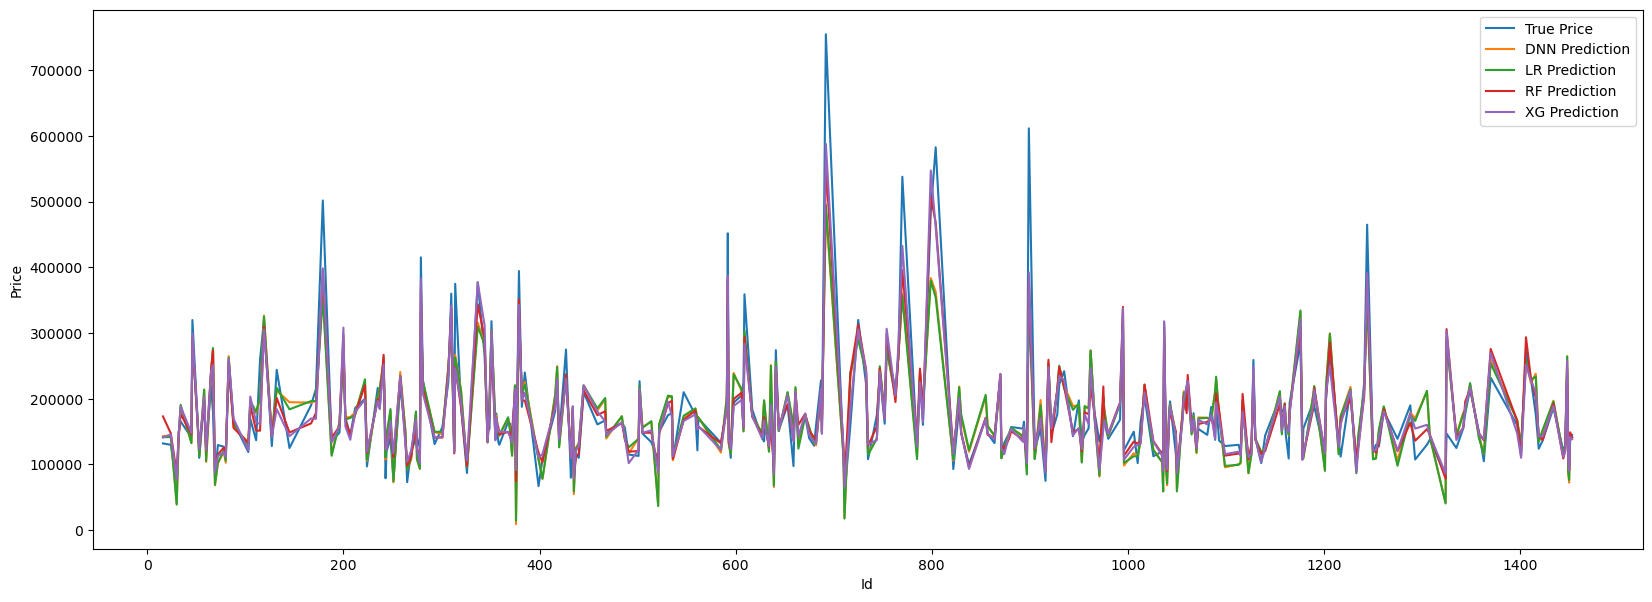

In [63]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(
    data=Ensemble_df, x="Id", y="True_Price", label="True Price"
)
sns.lineplot(
    data=Ensemble_df, x="Id", y="DNN_Predicted_Price", label="DNN Prediction", ax=ax
)
sns.lineplot(
    data=Ensemble_df, x="Id", y="LR_Predicted_Price", label="LR Prediction", ax=ax
)
sns.lineplot(
    data=Ensemble_df, x="Id", y="RF_Predicted_Price", label="RF Prediction", ax=ax
)
sns.lineplot(
    data=Ensemble_df, x="Id", y="XG_Predicted_Price", label="XG Prediction", ax=ax
)
ax.set_ylabel("Price")
plt.show()

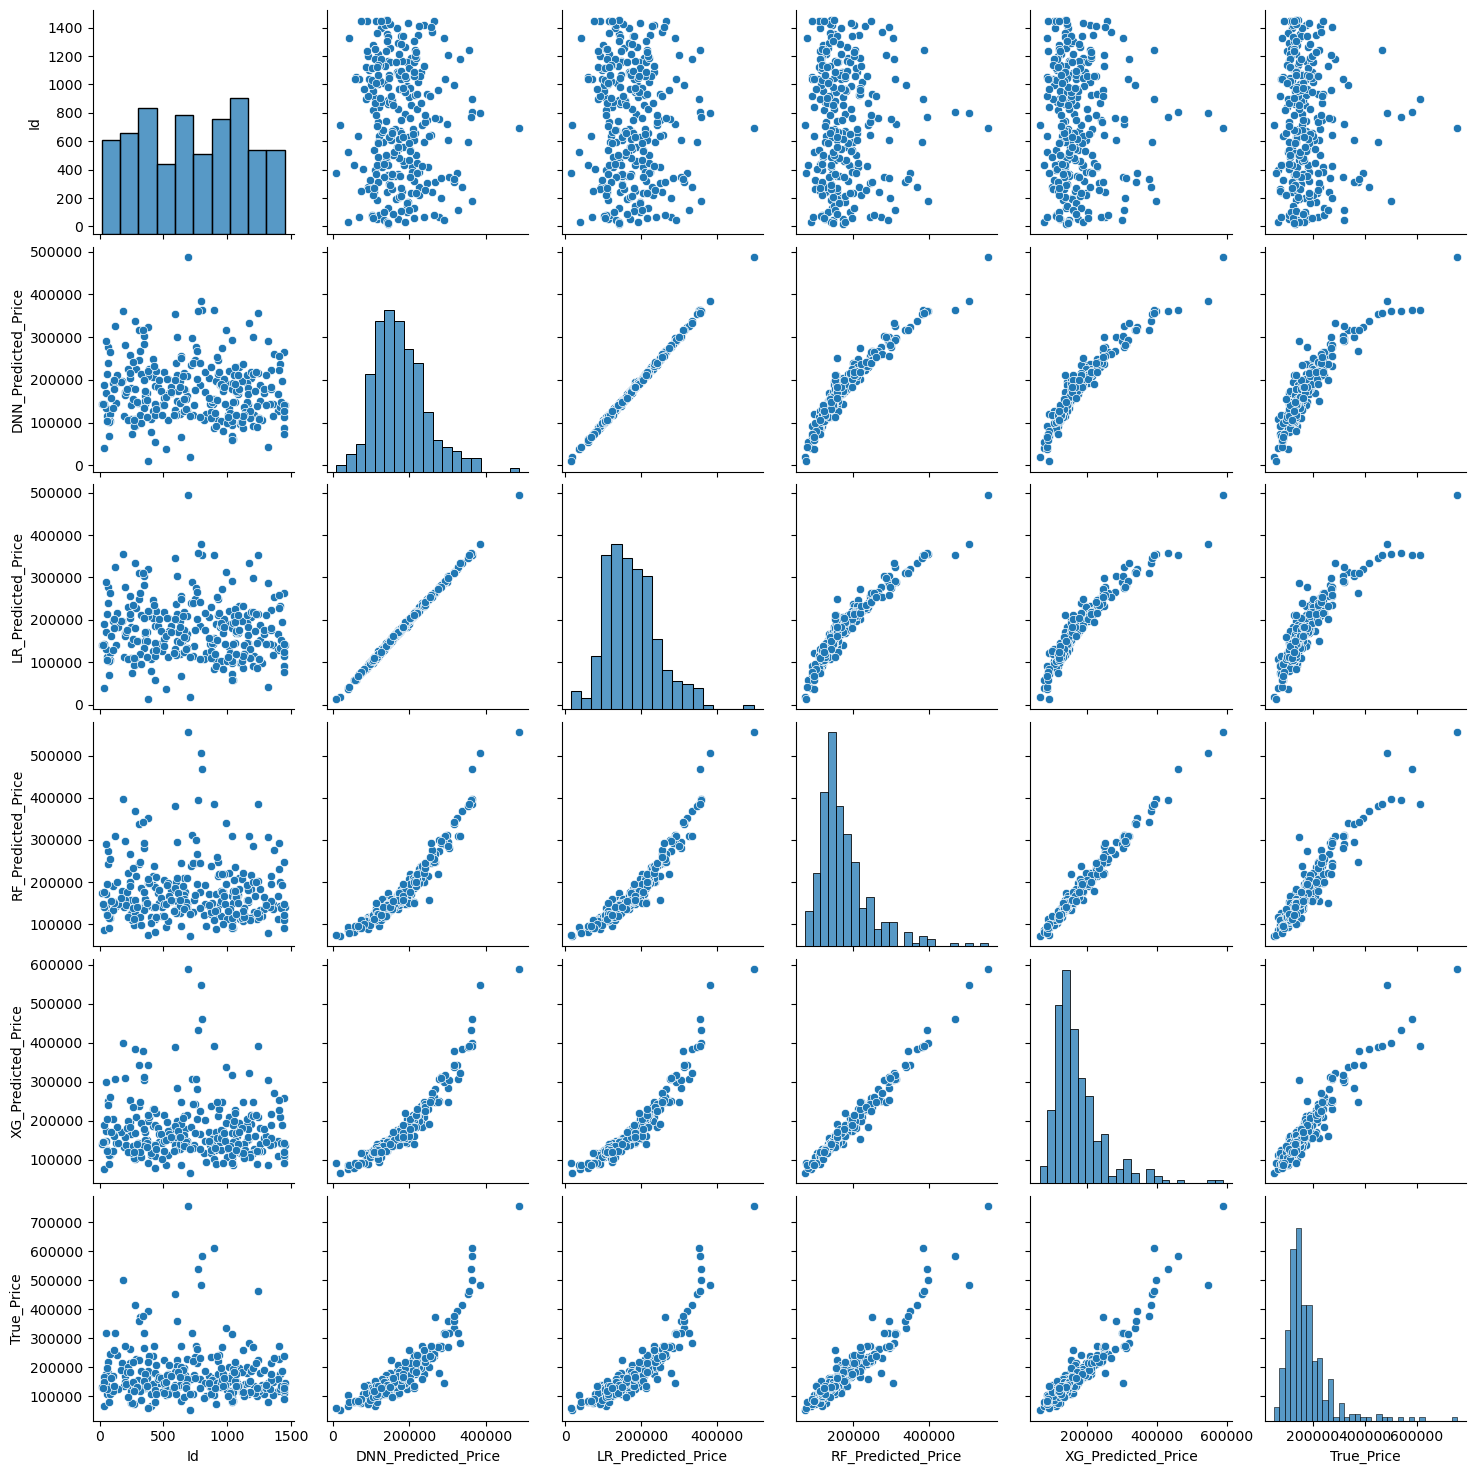

In [64]:
sns.pairplot(Ensemble_df)

#### Combine Models for Price Prediction 

In [65]:
# Median of the model's results
Ensemble_df['Ensemble_SalePrice'] = np.median(Ensemble_df, axis = 1)

Ensemble_df.head()


,Id,DNN_Predicted_Price,LR_Predicted_Price,RF_Predicted_Price,XG_Predicted_Price,True_Price,Ensemble_SalePrice
412,416,207217.578125,205019.592246,192328.75,186895.375000,181134.0,189612.062500
603,609,299764.875000,303575.517966,294092.16,283923.187500,359100.0,296928.517500
555,561,168528.953125,171498.553792,155910.00,153077.765625,121500.0,154493.882812
65,67,276590.718750,277242.304605,273259.00,251201.125000,180000.0,262230.062500
378,382,207952.437500,208529.229327,197267.05,197643.578125,187750.0,197455.314062


### Stacking (not working)

In [79]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
models = [(make_pipeline(StandardScaler(), LinearSVC(random_state=42))),
          (make_pipeline(StandardScaler(),RandomForestRegressor()))]
stack = StackingClassifier(estimators=models, final_estimator=XGBRegressor())
stack.fit(X_train, y_train).score(X_valid, y_valid)


TypeError: argument of type 'StandardScaler' is not iterable

In [80]:
from vecstack import stacking
first_model = LinearRegression()
second_model = RandomForestRegressor()
third_model = XGBRegressor()
models = [first_model, second_model, third_model]
train_stack, test_stack = stacking(models, X_train, X_valid, y_train, 
                                   regression=True, n_folds=4)
(train_stack, test_stack).fit(X_train, y_train).score(X_valid, y_valid)
last_model = third_model
last_model = last_model.fit(train_stack, y_train)
pred_last = last_model.predict(x_test)
print(mean_squared_error(y_valid, pred_last))

ValueError: y should be a 1d array, got an array of shape (289, 9) instead.

### 5 Observations  (Upto 1000 words)
Using our advanced linear regression models for predictive analysis, we were able to effectively analyze seventy-nine different components and features that affect the value of a home. These analytics and results can be very effective for homeowners, real estate agents, property developers, and investors to understand what factors positively and negatively affect the price of the home. Traditional and conventional models limit effectiveness because of the use of a simple regression model while our model has different factors and features. A few features analyzed in our data visualization model are sales price, overall quality, living room area, garage area, amount of bedrooms, amount of bathrooms, and pool area. When analyzing the linear regression model, the data is relatively useful in the real world but with some improvements to the functionality of the model, the results will improve the lives of real estate professionals. 

When individuals or businesses want to purchase or sell a property, it is very difficult to determine what society thinks is important to a home's value. Through the data received from Kaggle, we are able to narrow down different factors that have the largest positive impact on the value of a house which is ideal for investments. Through our model, the greatest positive impact on a home's value is the sale price, overall quality, and grand living room area. For those purchasing a property, it is clear that the price that the house is selling for has a massive impact on the true value of a home. Next, the overall quality which involves the design and cleanliness is massively important for the value as buyers may be more open to paying over the value solely based on the aesthetic of the property. Finally, the living room is commonly known for the most time spent by owners and visitors so it’s a massive component of a house. With knowing this, real estate professionals can take this information and make great use of it when considering their next home improvement or purchase. 

In contrast, there are factors that have a negative impact on the value of a home which is why professionals and businesses would be very interested in the results given from our model. Through the data received from Kaggle, we are able to narrow down different factors that have the largest negative correlation and impact on the value of a house. In our model, the greatest negative impact on a home’s value is the overall condition, year sold, and low-quality finishes. For those purchasing a property, it is clear that the price that the house is selling for has a massive impact on the true value of a home but the power of it can make it very negative because overpricing or underpricing can limit the strengths of real estate. Next, the years sold can have a large impact negatively on the value which is an interesting result as it proves that purchasers dislike how often the house is sold based on the year. Finally, if the house isn't organized and the finishes aren’t ideal then it’ll be very difficult to sell the house which will drive the value down. This information gives those real estate professionals ideas and analytics of where to improve a property and the impacts of these factors.

Observing and visualizing our model gave us a greater understanding and perspective on the different features of a property and why they either positively or negatively affect the value. It was eye-opening knowing how the years that a house was sold has such a negative effect on the value of a house but it’s very important to understand that buyers are concerned with too many previous homeowners. A factor to improve our model drastically would be to address the location as that may be the largest component when it comes to the purchase of a property. The location also greatly impacts the value of a house based on neighborhood, school district, and safety. Overall, our model is in progress to be sufficient in achieving our mission and answering our problem statement. As we continue to refine our advanced linear regression model by improving our variables and how we effectively improve our visualization, it will be interesting to experiment with the concept in the real world.

### 6 References :

Gallo, A. (2022). A Refresher on Regression Analysis. Harvard Business Review. 
    https://hbr.org/2015/11/a-refresher-on-regression-analysis

Grybauskas, A., Pilinkienė, V., & Stundžienė, A. (2021). Predictive analytics using big data for the real estate market during the COVID-19 pandemic. Journal of Big Data, 8(1). https://doi.org/10.
    1186/s40537-021-00476-0

Hong, J., Choi, H., & Kim, W.-sung. (2020). A house price valuation based on the random forest approach: The mass appraisal of residential property in South Korea. International Journal of        
    Strategic Property Management, 24(3), 140–152. https://doi.org/10.3846/ijspm.2020.11544

Montoya, A. (2016). House Prices - Advanced Regression Techniques. Kaggle. Retrieved March 22, 2023, from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

Ray, S. (2019). A Quick Review of Machine Learning Algorithms. 2019 International Conference on Machine Learning, Big Data, Cloud and Parallel Computing (COMITCon). https://doi.org/10.1109/   
    comitcon.2019.8862451
    
Satish, D. G. N., Raghavendran, D. C. V., Rao, M. M. D. S., & Srinivasulu, D. C. (2019). House price prediction using machine learning. International Journal of Innovative Technology and Exploring 
    Engineering, 8(9), 717–722. https://doi.org/10.35940/ijitee.i7849.078919 